<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-11-29 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 4.0</font></h3>

### Your information:
- Fullname: Kiều Trí Đăng
- Date of birth: September 19th 1993
- Place of birth: Ho Chi Minh city
- Email: kieutridang@gmail.com
- Mobile phone: 0397979870

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Algorithm** to predict: "price of car" by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [150]:
missing_values = ['?','--','-','??','.']

In [151]:
cars = pd.read_csv('./imports_85.csv',na_values = missing_values)
columns = ['symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price'
 ]
cars.columns = columns
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0


In [152]:
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,164.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,200.000000,200.000000,204.000000,202.000000,202.000000,204.000000,204.000000,200.000000
mean,0.823529,122.000000,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,3.329050,3.258300,10.148137,104.222772,5125.990099,25.240196,30.769608,13205.690000
std,1.239035,35.442168,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,0.274044,0.314868,3.981000,39.810182,480.443680,6.551513,6.898337,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [153]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

### Variable Identification

In [154]:
price = cars.price

In [155]:
symboling = cars.symboling
normalized_losses = cars['normalized-losses']
make = cars.make
fuel_type = cars['fuel-type']
aspiration = cars.aspiration

## Identify Variables:
* price: Target
* the others are Predictors

Text(0.5, 1.0, 'Lượng giá trị bị mất ở mỗi feature')

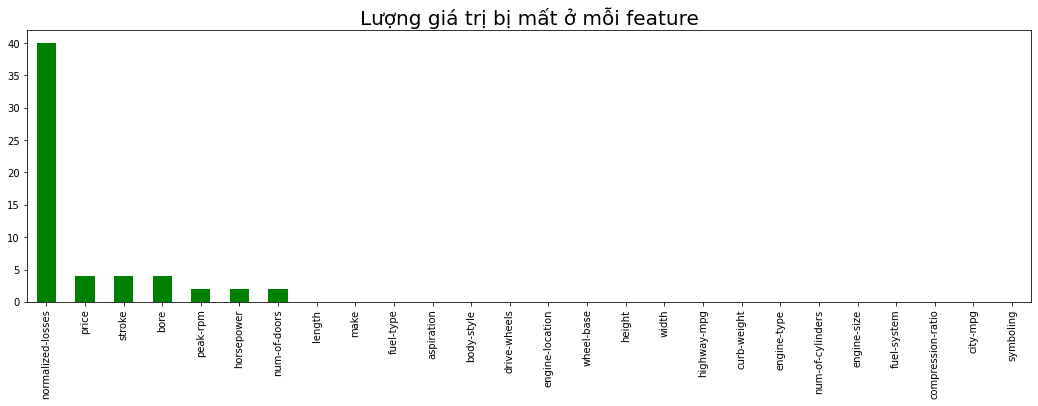

In [156]:
plt.subplots(1,1, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'green')
plt.title('Lượng giá trị bị mất ở mỗi feature', fontsize = 20)

In [157]:
# Nội suy một số dự liệu:
cars['normalized-losses'] = cars['normalized-losses'].interpolate(method = "linear" ,limit_direction = "both")

cars['price'] = cars['price'].interpolate(method = "linear", limit_direction = "both")
cars['stroke'] = cars['stroke'].interpolate(method = "linear", limit_direction = "both")
cars['bore'] = cars['bore'].interpolate(method = "linear", limit_direction = "both")
cars['peak-rpm'] = cars['peak-rpm'].interpolate(method = "linear", limit_direction = "both")
cars['horsepower'] = cars['horsepower'].interpolate(method = "linear", limit_direction = "both")

Text(0.5, 1.0, 'Lượng giá trị bị mất ở mỗi feature')

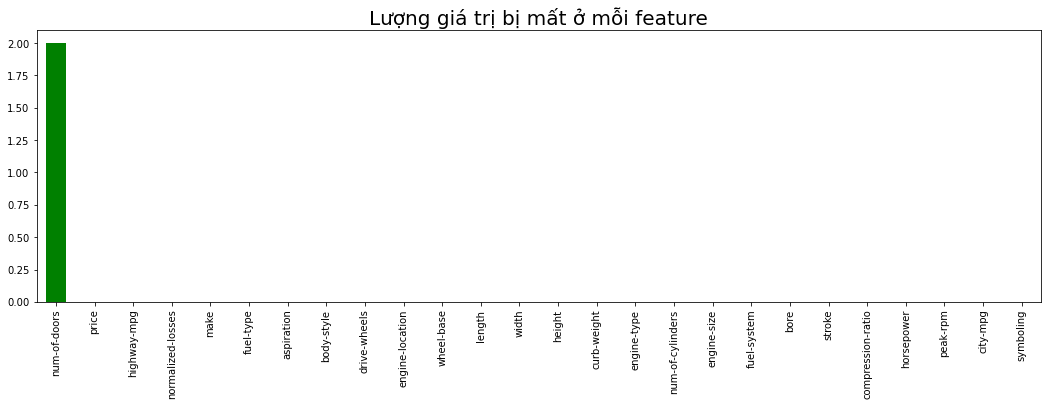

In [158]:
plt.subplots(1,1, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'green')
plt.title('Lượng giá trị bị mất ở mỗi feature', fontsize = 20)

In [159]:
# Thay 2 phần tử thiếu
cars['num-of-doors'] = cars['num-of-doors'].fillna('four')

<AxesSubplot:xlabel='price', ylabel='Count'>

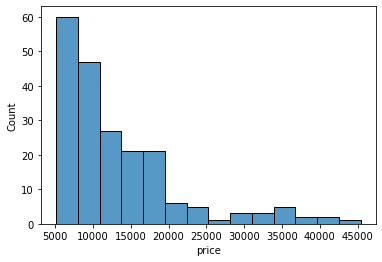

In [160]:
sns.histplot(cars.price)

### Nhận xét:
* Price không phải là phân phối chuẩn
* Price bị lệch phải

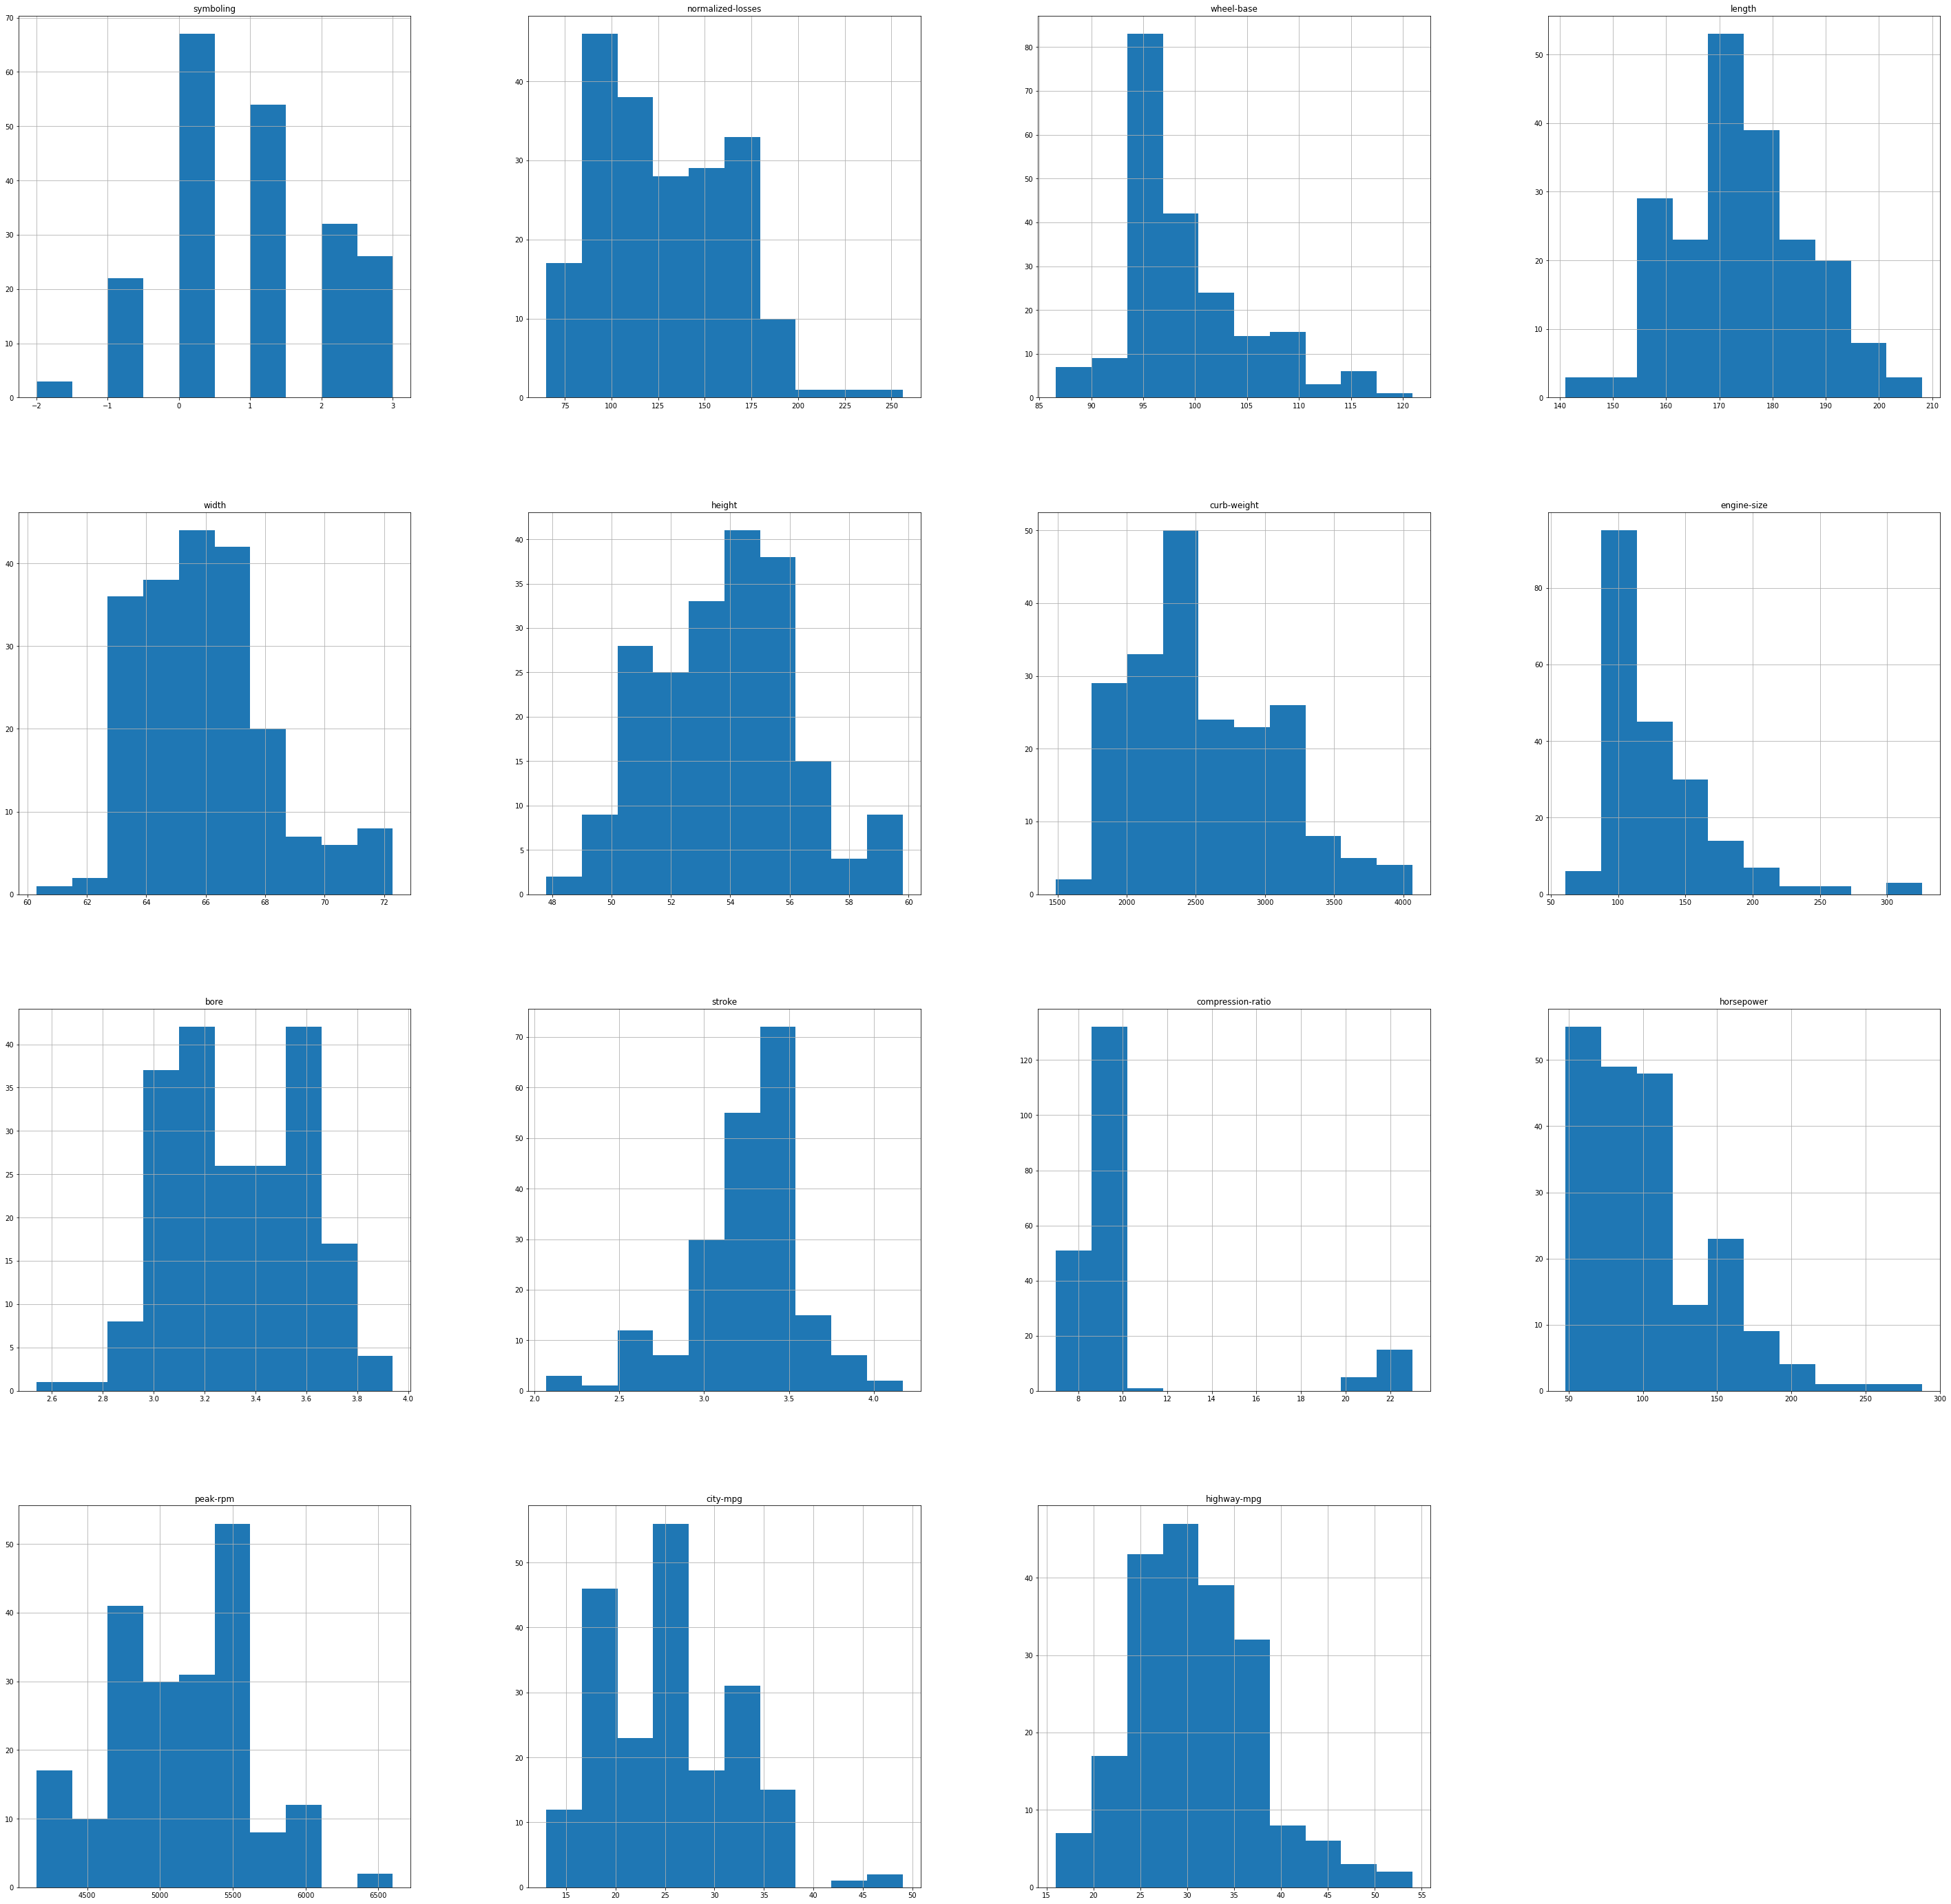

In [161]:
numeric_variables = ['symboling','normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg']

cars[numeric_variables].hist(bins=10, figsize=(50,50), layout=(4,4));

### Nhận xét:
* Không có numeric feature nào có phân phối chuẩn

## Continuous vs Continuous

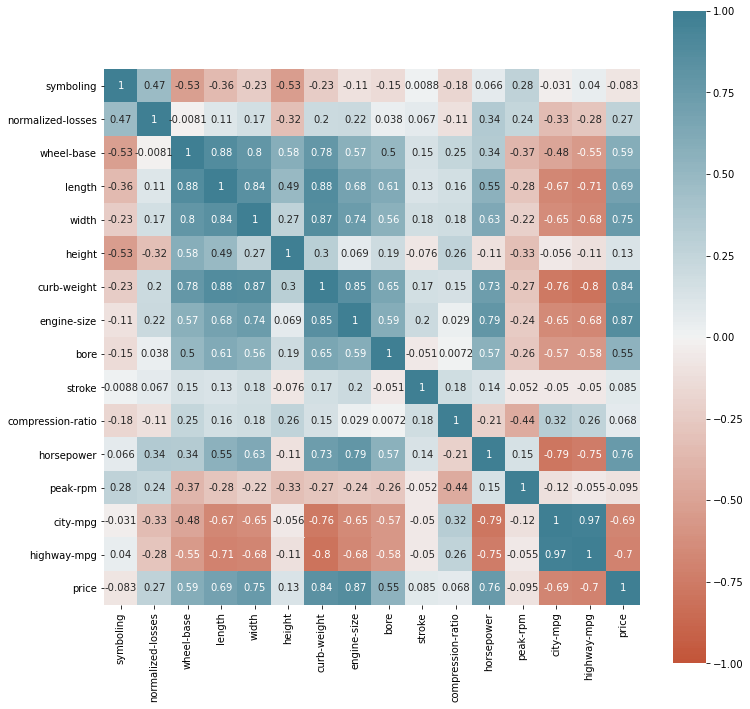

In [162]:
corr = cars.corr()

plt.figure(figsize=(12,12))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);

### Nhận xét:
* engine_size, horsepower, curb_weight, length và width có tương quan mạnh với car prices

In [163]:
def continuous_bivariate_analyze(var1, var2):
    plt.figure(figsize=(10,6))
    plt.plot(var1, var2,'.')

    plt.xlabel(var1.name) # add xlabel
    plt.ylabel(var2.name) # add ylabel
    plt.title('Mối quan hệ giữa {}, {}'.format(var1.name, var2.name));

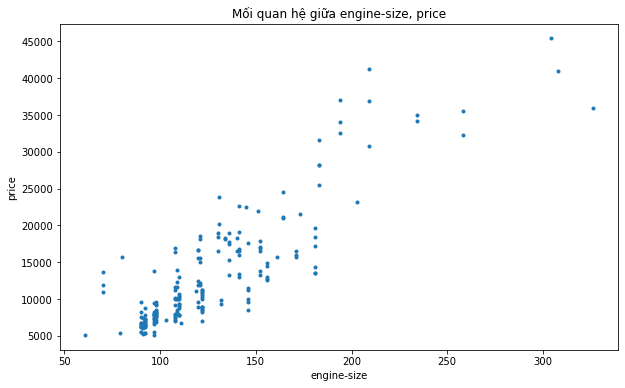

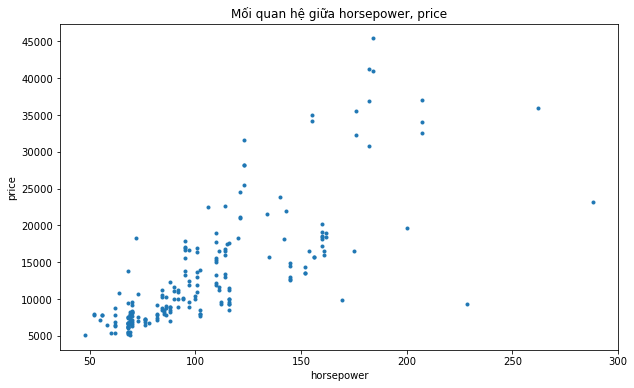

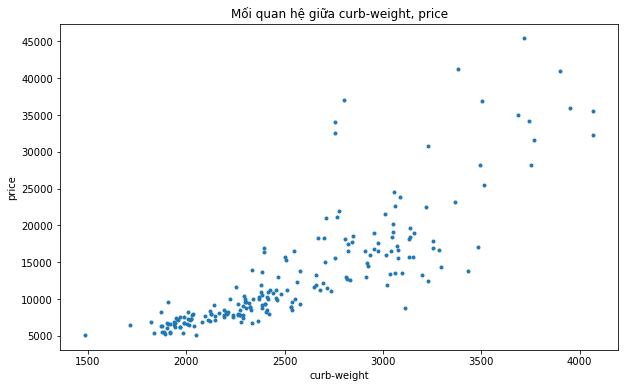

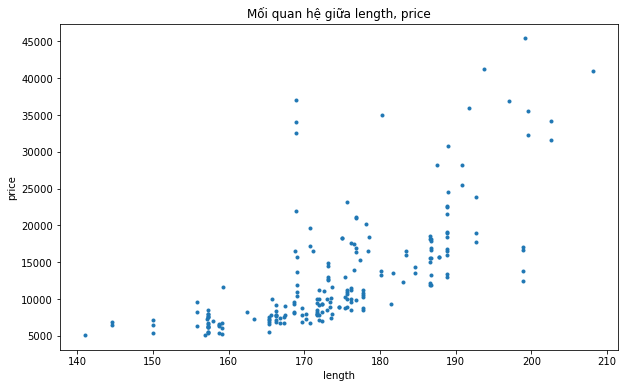

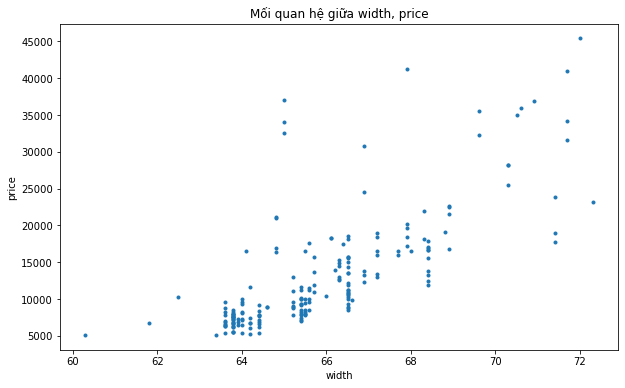

In [164]:
continuous_vars = ['engine-size', 'horsepower', 'curb-weight', 'length', 'width']
for var in continuous_vars:
    continuous_bivariate_analyze(cars[var], price)

### Nhận xét:
* Nhìn có vẻ không tuyến tính lắm.

## Categorical vs Continuous (Price)

In [165]:
def categorical_continuous_bivariate_analyze(categorical, continuous):
    plt.figure(figsize=(24,8))
    sns.boxplot(x=categorical.name,y=continuous,data=cars)
    plt.title('Phân phối của {} với price'.format(categorical.name));

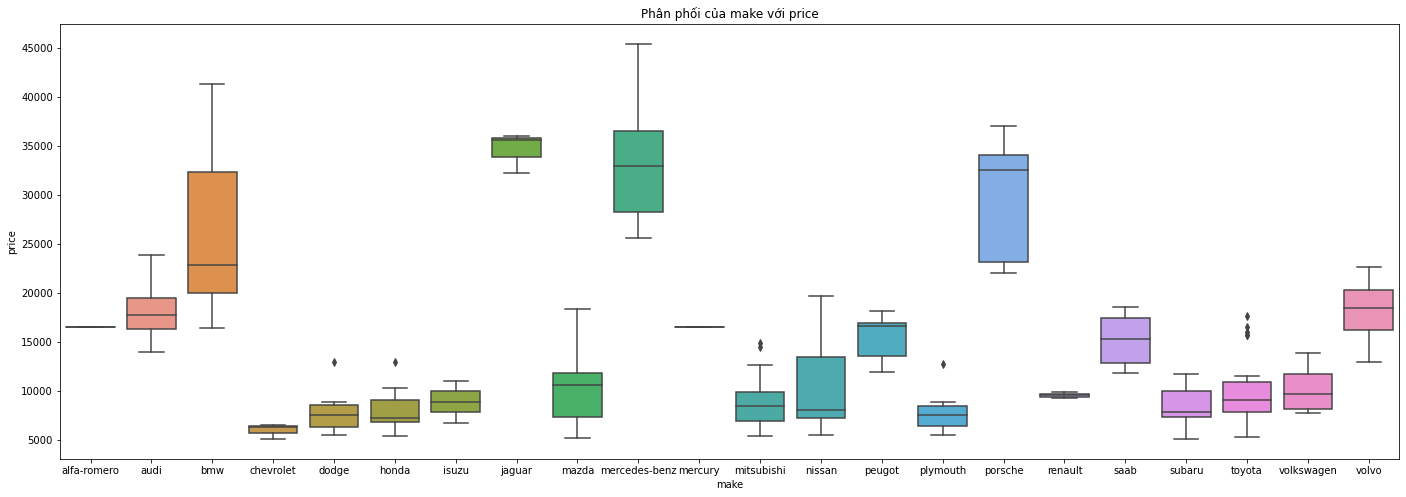

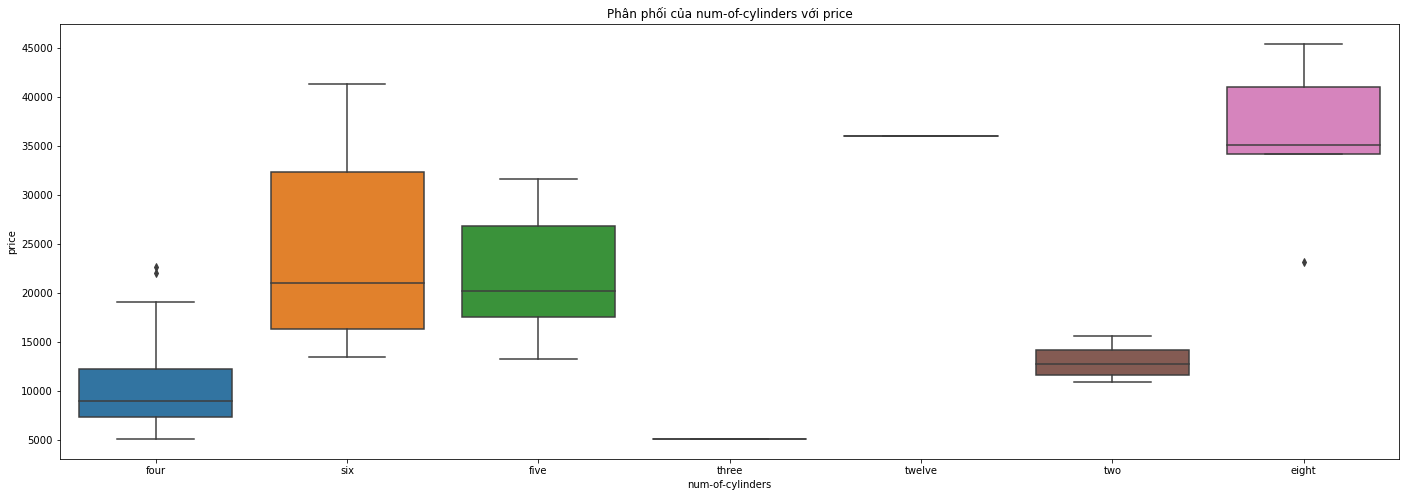

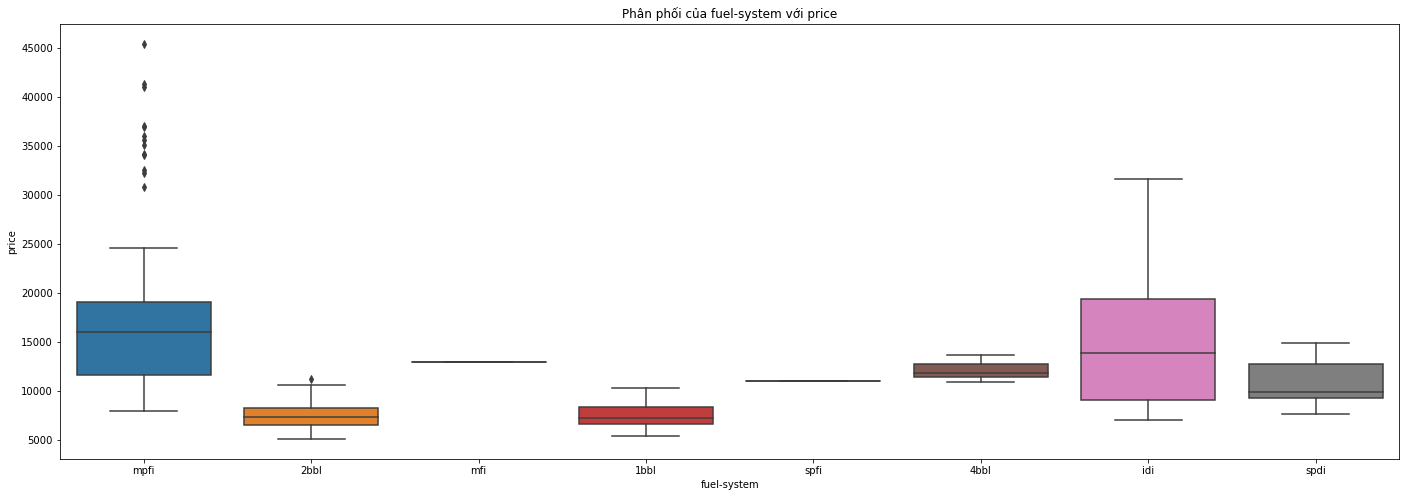

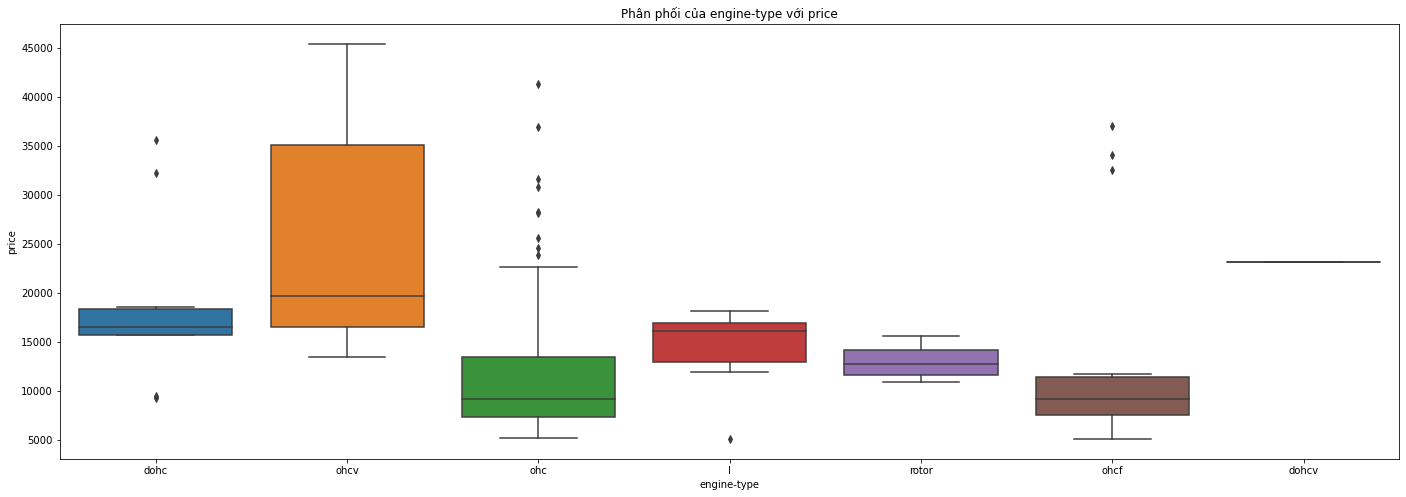

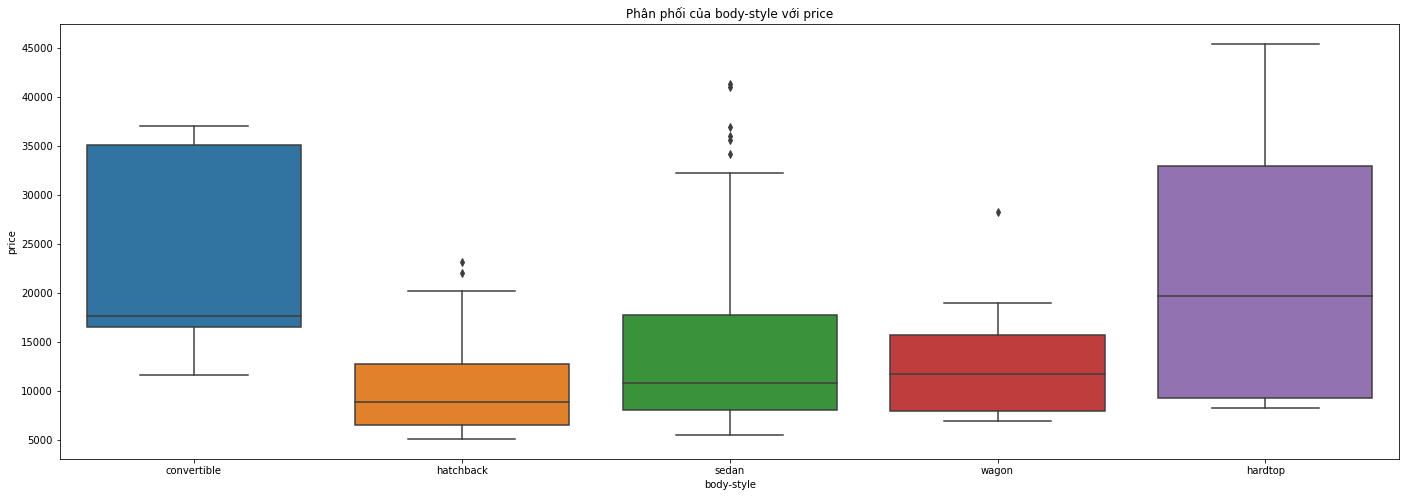

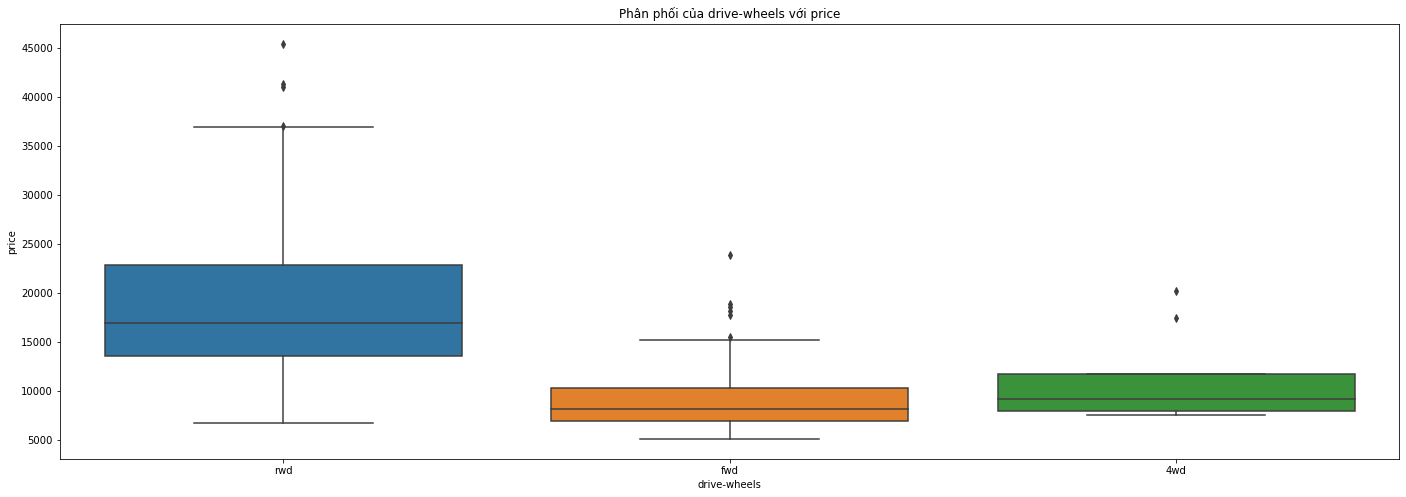

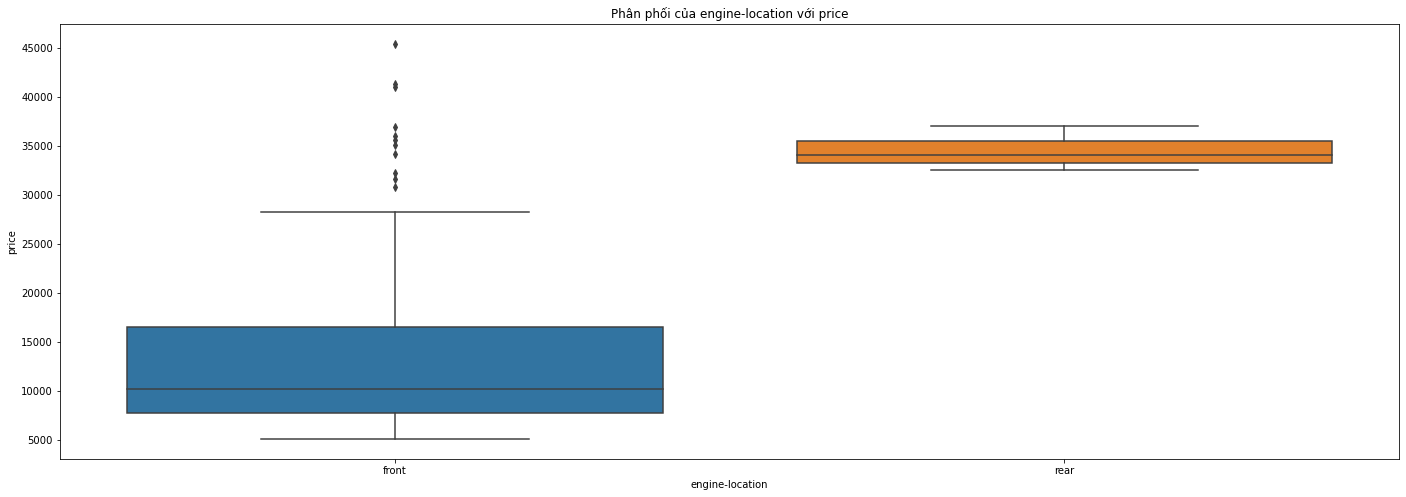

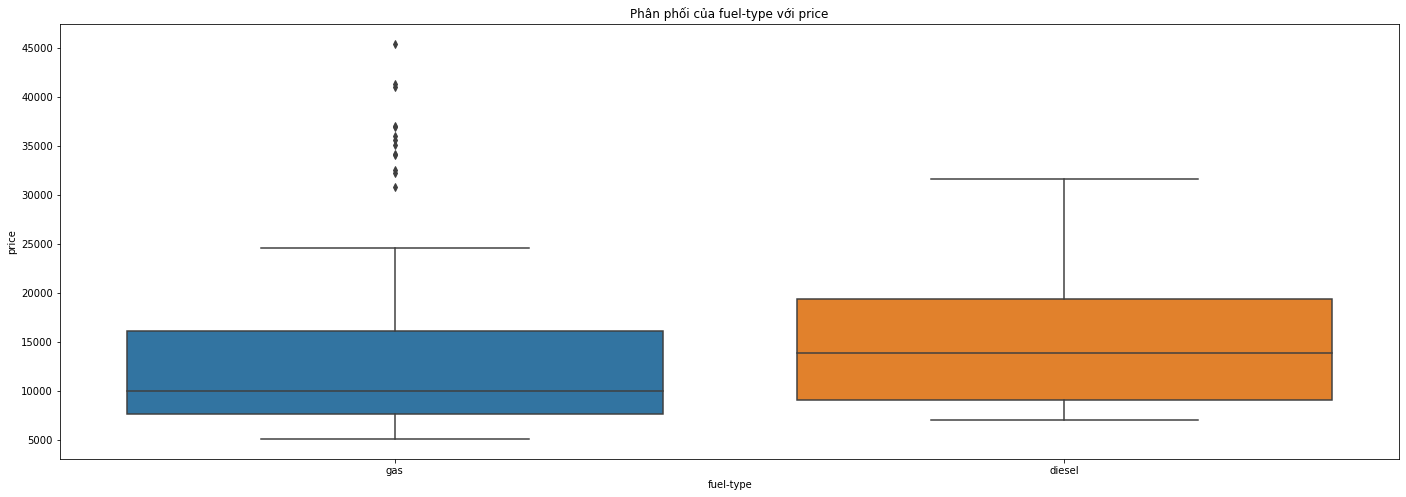

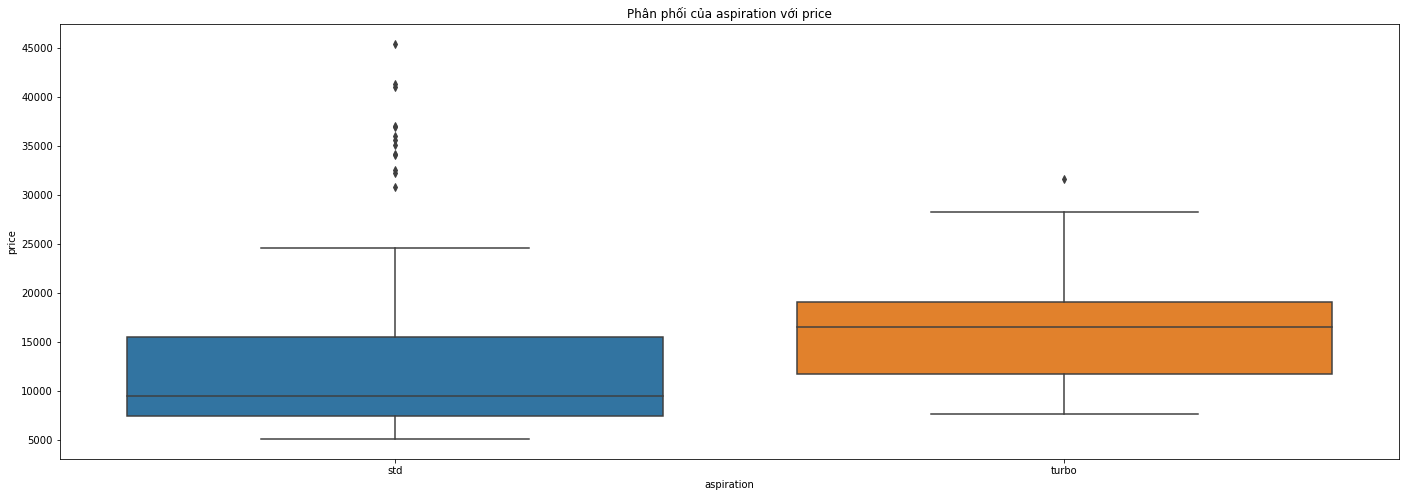

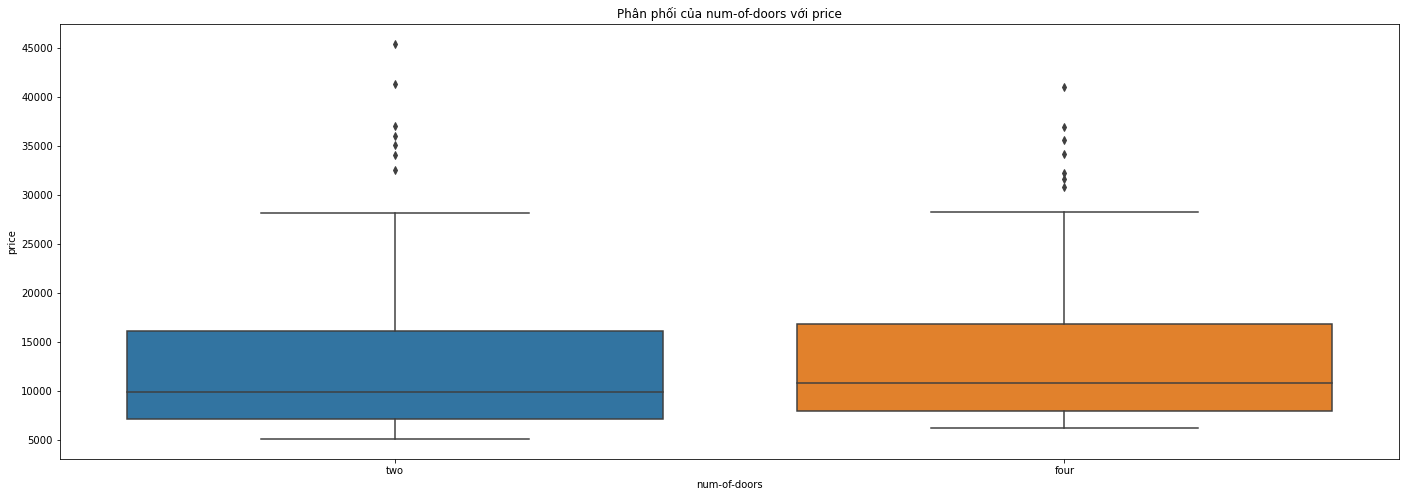

In [166]:
categorical_vars = ['make', 'num-of-cylinders', 'fuel-system', 'engine-type', 'body-style', 'drive-wheels', 'engine-location', 'fuel-type', 'aspiration', 'num-of-doors']
for var in categorical_vars:
    categorical_continuous_bivariate_analyze(cars[var], cars.price)

### Nhận xét:
* Các hãng xe mercedes-benz, porsche, jaguar và bmw giá cao hơn hẳn, đây là các dòng xe sang
* Xe càng nhiều xylanh thì giá càng cao
* Máy ohcv và dohcv thì giá cao
* Những chiếc xe có bánh dẫn động fwd và 4wd có xu hướng rẻ hơn và những chiếc xe rwd đắt hơn
* Tất cả các xe có động cơ nằm phía sau đều có giá cao

## Feature Engineer

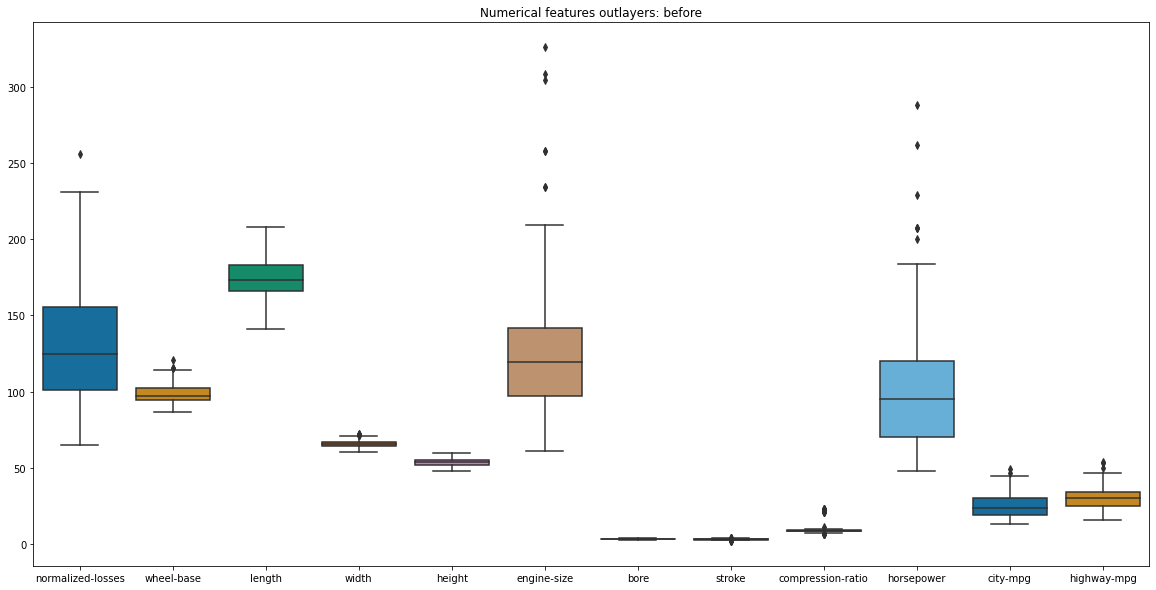

In [167]:
numeric_variables = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[numeric_variables], 
                 palette="colorblind")
plt.title('Numerical features outlayers: before');

In [168]:
# Remove numeric variables outliers
for feature in numeric_variables:
    Q1 = cars[feature].quantile(0.25)
    Q3 = cars[feature].quantile(0.75)
    IQR = Q3 - Q1
    cars[feature] = np.where(cars[feature]>(Q3+1.5*IQR),(Q3+1.5*IQR),cars[feature])
    cars[feature] = np.where(cars[feature]<(Q1-1.5*IQR),(Q1-1.5*IQR),cars[feature])

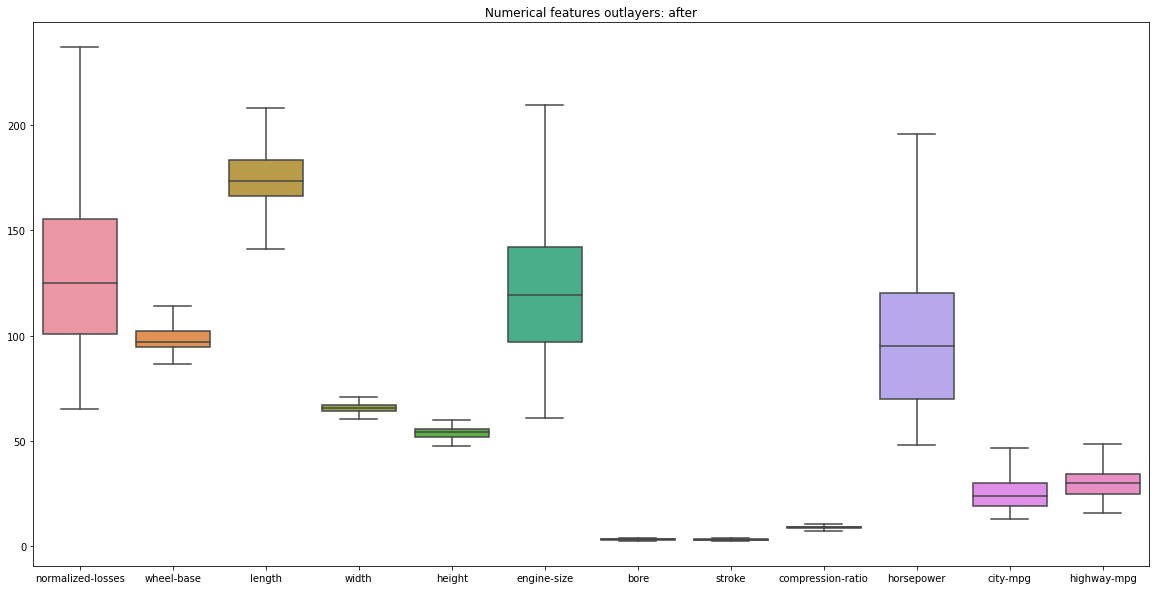

In [169]:
plt.figure(figsize=(20,10))
sns.boxplot(data=cars[numeric_variables])
plt.title('Numerical features outlayers: after');

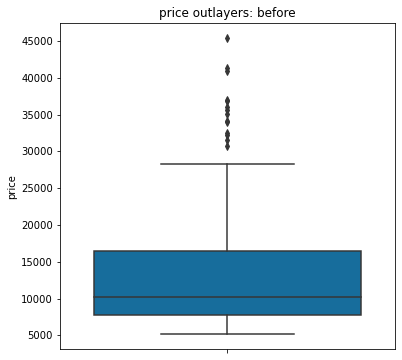

In [170]:
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars, 
                 palette="colorblind")
plt.title('price outlayers: before');

In [171]:
# Remove price outliers
Q1 = cars['price'].quantile(0.25)
Q3 = cars['price'].quantile(0.75)
IQR = Q3 - Q1
cars['price'] = np.where(cars['price']>(Q3+1.5*IQR),(Q3+1.5*IQR),cars['price'])
cars['price'] = np.where(cars['price']<(Q1-1.5*IQR),(Q1-1.5*IQR),cars['price'])

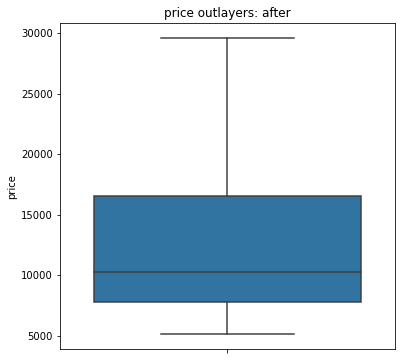

In [172]:
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars)
plt.title('price outlayers: after');

### convert num_of_cylinders từ dạng category sang numeric vì thực ra các giá trị của dữ liệu mang tính phân loại hơn

In [176]:
cars['num-of-cylinders'][cars['num-of-cylinders']=='two'] = 2
cars['num-of-cylinders'][cars['num-of-cylinders']=='three'] = 3
cars['num-of-cylinders'][cars['num-of-cylinders']=='four'] = 4
cars['num-of-cylinders'][cars['num-of-cylinders']=='five'] = 5
cars['num-of-cylinders'][cars['num-of-cylinders']=='six'] = 6
cars['num-of-cylinders'][cars['num-of-cylinders']=='eight'] = 8
cars['num-of-cylinders'][cars['num-of-cylinders']=='twelve'] = 12

cars['num-of-cylinders'] = cars['num-of-cylinders'].astype('int64')
cars['num-of-cylinders']

0      4
1      6
2      4
3      5
4      5
      ..
199    4
200    4
201    6
202    6
203    4
Name: num-of-cylinders, Length: 204, dtype: int64

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

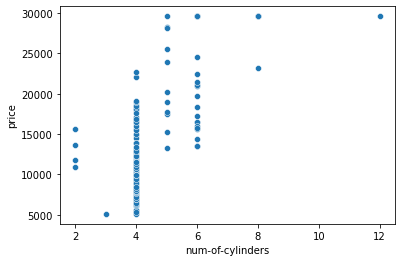

In [181]:
sns.scatterplot(data=cars, x=cars['num-of-cylinders'], y=cars['price'])

### Nhận xét:
* Giá có vẻ như có khoản cách khá lớn so với num-of-cylinders
* Dùng phương pháp logaric để normalize lại giá

In [182]:
cars['price'] = np.log1p(cars['price'])

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

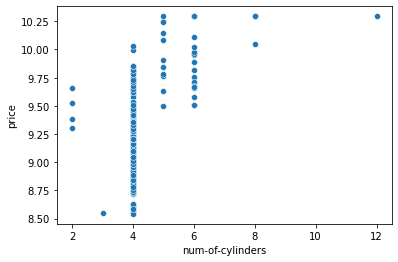

In [183]:
sns.scatterplot(data=cars, x=cars['num-of-cylinders'], y=cars['price'])

In [184]:
# converting maker sang continuous
cars['make'][cars['make']=='chevrolet'] = 1
cars['make'][cars['make']=='renault'] = 2
cars['make'][cars['make']=='isuzu'] = 3
cars['make'][cars['make']=='subaru'] = 4
cars['make'][cars['make']=='plymouth'] = 5
cars['make'][cars['make']=='dodge'] = 6
cars['make'][cars['make']=='honda'] = 7
cars['make'][cars['make']=='volkswagen'] = 8
cars['make'][cars['make']=='mitsubishi'] = 9
cars['make'][cars['make']=='alfa-romero'] = 10
cars['make'][cars['make']=='mercury'] = 11
cars['make'][cars['make']=='toyota'] = 12
cars['make'][cars['make']=='peugot'] = 13
cars['make'][cars['make']=='mazda'] = 14
cars['make'][cars['make']=='saab'] = 15
cars['make'][cars['make']=='nissan'] = 16
cars['make'][cars['make']=='volvo'] = 17
cars['make'][cars['make']=='audi'] = 18
cars['make'][cars['make']=='jaguar'] = 19
cars['make'][cars['make']=='porsche'] = 20
cars['make'][cars['make']=='bmw'] = 21
cars['make'][cars['make']=='mercedes-benz'] = 22
cars['make']=cars['make'].astype('int64')

<AxesSubplot:xlabel='make', ylabel='price'>

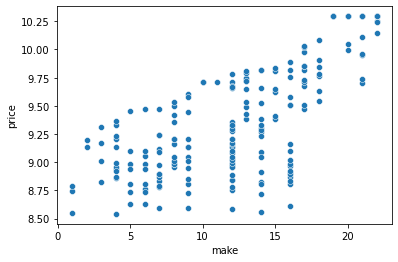

In [185]:
sns.scatterplot(data=cars, x=cars['make'], y=cars['price'])